In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 1s 555ms/step
Unsupported file format: 
1/1 [==============================] - 1s 550ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


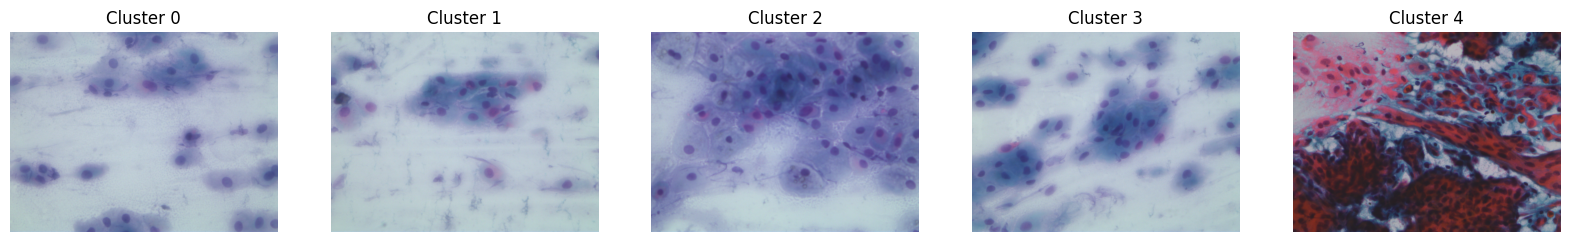

1/1 [==============================] - 1s 599ms/step
Unsupported file format: 
1/1 [==============================] - 1s 545ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


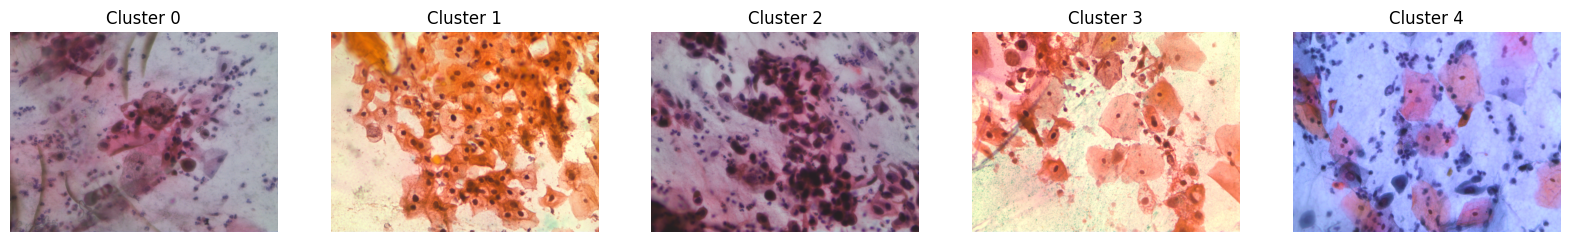

1/1 [==============================] - 1s 556ms/step
Unsupported file format: 
1/1 [==============================] - 1s 559ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


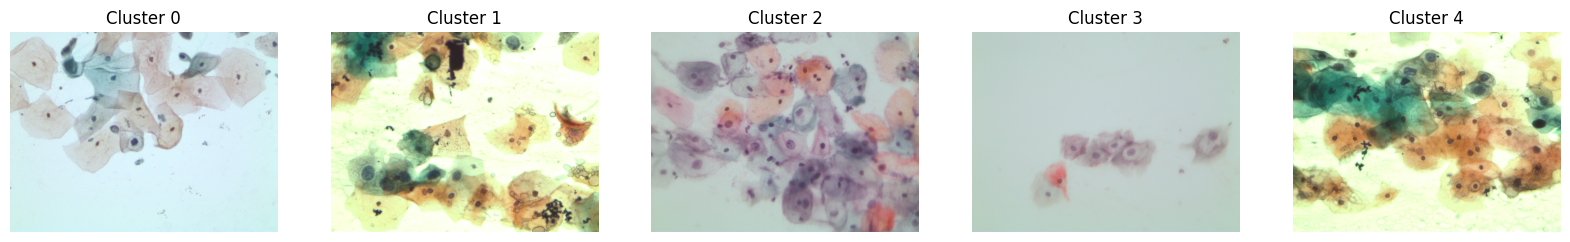

1/1 [==============================] - 1s 550ms/step
Unsupported file format: 
1/1 [==============================] - 1s 798ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


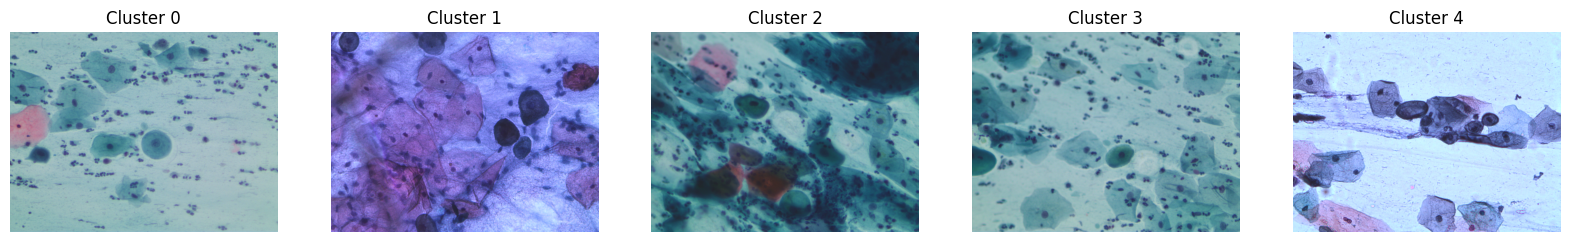

1/1 [==============================] - 1s 555ms/step
Unsupported file format: 
1/1 [==============================] - 1s 565ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


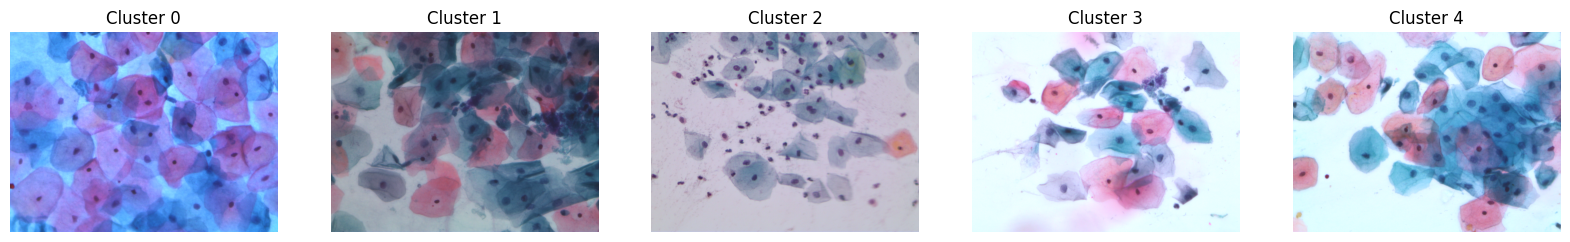

Dataset: im_Parabasal
Accuracy: 0.009259259259259259
Precision: 0.2
Recall: 0.0018518518518518517
F1-score: 0.003669724770642201
------------------------------------
Dataset: im_Dyskeratotic
Accuracy: 0.5964125560538116
Precision: 0.2
Recall: 0.11928251121076232
F1-score: 0.149438202247191
------------------------------------
Dataset: im_Koilocytotic
Accuracy: 0.004201680672268907
Precision: 0.2
Recall: 0.0008403361344537815
F1-score: 0.0016736401673640166
------------------------------------
Dataset: im_Metaplastic
Accuracy: 0.23616236162361623
Precision: 0.2
Recall: 0.047232472324723246
F1-score: 0.0764179104477612
------------------------------------
Dataset: im_Superficial-Intermediate
Accuracy: 0.1746031746031746
Precision: 0.2
Recall: 0.03492063492063492
F1-score: 0.05945945945945945
------------------------------------


In [13]:
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from skimage.feature import local_binary_pattern
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarning related to KMeans

# Step 1: Data Acquisition and Preprocessing
dataset_path = '/content/drive/MyDrive/Computer_vision'

# Step 2: Pre-trained Feature Extraction
def extract_pretrained_features(img_path, model, preprocess_func):
    try:
        img = image.load_img(img_path, target_size=(224, 224), color_mode="rgb")
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_func(x)
        features = model.predict(x)
        features = np.squeeze(features)
        return features
    except Exception as e:
        pass
        return None

# Load pre-trained models
vgg_model = VGG16(weights='imagenet', include_top=False)
vgg_model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)  # Modify to extract features from desired layer
resnet_model = ResNet50(weights='imagenet', include_top=False)
inception_model = InceptionV3(weights='imagenet', include_top=False)

# Step 3: Clustering
def perform_clustering(features, num_clusters):
    features = np.reshape(features, (features.shape[0], -1))  # Reshape the features array
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(features)
    return kmeans.labels_

# Step 4: Hand-crafted Feature Comparison
def extract_hog_features(img):
    img_gray = np.mean(img, axis=-1)  # Convert to grayscale
    features, _ = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return features

def extract_lbp_features(img):
    img_gray = np.mean(img, axis=-1)  # Convert to grayscale
    features = local_binary_pattern(img_gray, 8, 1, method='uniform')
    return features.flatten()

# Step 6: Evaluation Metrics
def evaluate_metrics(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    return accuracy, precision, recall, f1

# Step 7: Comparison with Cropped Images (visual analysis)
import matplotlib.pyplot as plt

def visualize_clusters(labels, image_paths):
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    fig, axs = plt.subplots(1, num_clusters, figsize=(20, 4))
    for cluster in range(num_clusters):
        cluster_images = image_paths[labels == cluster]
        axs[cluster].set_title(f"Cluster {cluster}")
        axs[cluster].axis('off')
        if len(cluster_images) > 0:
            img = image.load_img(cluster_images[0])
            axs[cluster].imshow(img)
    plt.show()

# Main loop
label_encoder = LabelEncoder()
datasets = []

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if not os.path.isdir(folder_path):
        continue

    dataset = {}
    dataset['name'] = folder_name
    dataset['true_labels'] = []
    dataset['predicted_labels'] = []

    # Step 2: Pre-trained Feature Extraction
    features = []
    image_paths = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        ext = os.path.splitext(img_path)[1]
        if ext.lower() == ".bmp":
            img_features = extract_pretrained_features(img_path, vgg_model, vgg_preprocess)  # Change the model here if desired
        elif ext.lower() == ".dat":
            img_features = extract_pretrained_features(img_path, resnet_model, resnet_preprocess)  # Change the model here if desired
        else:
            print(f"Unsupported file format: {ext}")
            continue

        if img_features is not None:
            features.append(img_features)
            image_paths.append(img_path)

    features = np.array(features)
    image_paths = np.array(image_paths)

    # Fit the label encoder
    label_encoder.fit([folder_name])

    # Step 3: Clustering
    num_clusters = 5  # Specify the desired number of clusters
    try:
        predicted_labels = perform_clustering(features, num_clusters)
    except ValueError:
        print("Error performing clustering. Please check the dimensions of the features array.")
        continue

    # Step 4: Hand-crafted Feature Comparison
    hog_features = []
    lbp_features = []

    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224), color_mode="rgb")
        img = image.img_to_array(img)
        img = img.astype(np.uint8)

        hog_feat = extract_hog_features(img)
        lbp_feat = extract_lbp_features(img)

        hog_features.append(hog_feat)
        lbp_features.append(lbp_feat)

    hog_features = np.array(hog_features)
    lbp_features = np.array(lbp_features)

    # Step 6: Evaluation Metrics
    true_labels = label_encoder.transform([folder_name] * len(image_paths))
    accuracy, precision, recall, f1 = evaluate_metrics(true_labels, predicted_labels)

    # Step 7: Comparison with Cropped Images (visual analysis)
    visualize_clusters(predicted_labels, image_paths)

    # Save the results to the dataset
    dataset['true_labels'] = true_labels
    dataset['predicted_labels'] = predicted_labels
    dataset['accuracy'] = accuracy
    dataset['precision'] = precision
    dataset['recall'] = recall
    dataset['f1'] = f1

    # Append the dataset to the list of datasets
    datasets.append(dataset)

# Print the results for each dataset and each strategy
for dataset in datasets:
    print("Dataset:", dataset['name'])
    print("Accuracy:", dataset['accuracy'])
    print("Precision:", dataset['precision'])
    print("Recall:", dataset['recall'])
    print("F1-score:", dataset['f1'])
    print("------------------------------------")
